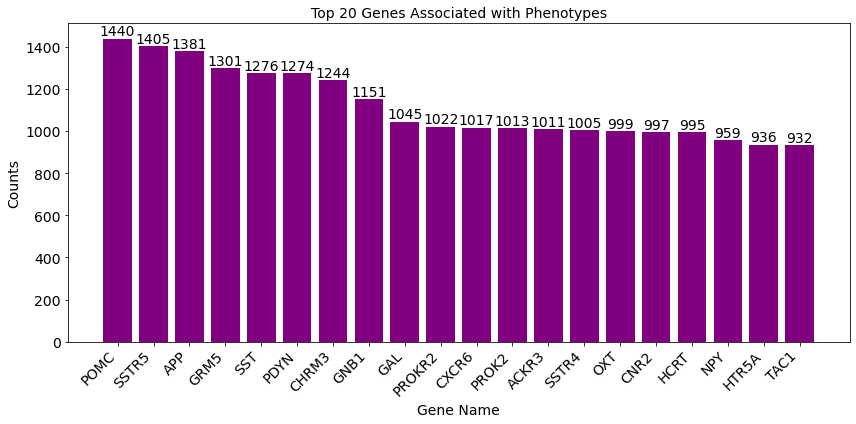

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel data into a DataFrame
file_path = 'Supplemental File 1_ SCZ_PSCZ_MDD_RD_UD_BPDv3.xlsx'
sheet_name = 'SummOfMostCommonGenes'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Sort the DataFrame by "Occured in X drug networks" column in descending order
df_sorted = df.sort_values(by='Occured in X drug networks', ascending=False)

# Select the top 20 genes
top_20_genes = df_sorted.head(20)

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_20_genes['GeneName'], top_20_genes['Occured in X drug networks'], color='purple')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Gene Name', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top 20 Genes Associated with Phenotypes', fontsize=14)

# Add counts above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{int(height)}', ha='center', va='bottom', fontsize=14)

plt.tight_layout()

# Save the plot as an image
plt.savefig('SCZ_PSCZ_MDD_RD_UD_BPD_genes_bg_v2.png', dpi=300)

# Show the plot
plt.show()

# Save the plot as an image
#plt.savefig('SCZ_PSCZ_MDD_RD_UD_BPD_genes_bg_v2.png')

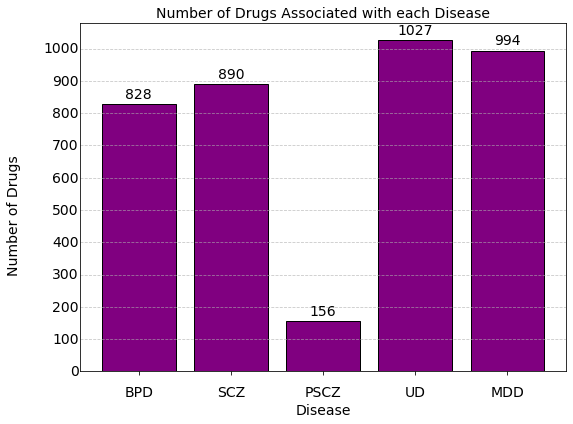

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace the file path with the new Excel file path
file_path = "Supplemental File 1_ SCZ_PSCZ_MDD_RD_UD_BPDv3.xlsx"
sheet_name = 'allResults'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Read the Excel sheet into a pandas DataFrame
# df = pd.read_excel(file_path)

# Rename the 'cui' values
cui_mapping = {
    'SCZ': 'BPD',
    'BPD': 'SCZ',
    'MDD': 'PSCZ',
    'RD': 'UD',
    'UD': 'MDD'
}

df['cui'] = df['cui'].replace(cui_mapping)

# Group the DataFrame by 'cui' and count the number of unique 'DrugName' values for each 'cui'
grouped = df.groupby('cui')['DrugName'].nunique()

# Create numeric labels for the x-axis
numeric_labels = range(len(grouped))

# Plot the histogram with purple bars
plt.figure(figsize=(8, 6))
bars = plt.bar(numeric_labels, grouped, color='purple', edgecolor='black')

# Add custom labels for each bar indicating the count of drugs associated with each 'cui'
for i, bar in enumerate(bars):
    count = grouped.iloc[i]
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, str(count), ha='center', va='bottom', color='black', fontsize=14)

plt.xlabel('Disease', fontsize=14)
plt.ylabel('Number of Drugs', fontsize=14)
plt.title('Number of Drugs Associated with each Disease', fontsize=14)

# Customize the x-axis tick labels to show the 'cui' values
tick_labels = ['BPD', 'SCZ', 'PSCZ', 'UD', 'MDD']
plt.xticks(numeric_labels, tick_labels, rotation=0, fontsize=14)

# Remove y-axis ticks and tick labels
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

# Set y-axis tick positions and labels at each 100 interval
y_ticks = range(0, max(grouped) + 1, 100)
plt.yticks(y_ticks, fontsize=14)

# Add values for each y-axis line with space between y-axis label and the graph
for y_tick in y_ticks:
    plt.text(-0.65, y_tick, str(y_tick), ha='right', va='center', color='black', fontsize=14)

# Add space between y-axis label and the y-axis, move it closer to the table
plt.gca().yaxis.set_label_coords(-0.12, 0.45)

# Add space between x-axis and the numbers indicating each x-axis line
plt.gca().xaxis.set_tick_params(pad=10)

# Move the numbers on the left side (y-axis labels) a bit more to the left
plt.gca().tick_params(axis='y', which='both', pad=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

plt.tight_layout()

# Save the plot as an image file
plt.savefig("BPD_SCZ_PSCZ_UD_RD_MDD_drug_hg.png")

plt.show()